#说明
使用sklearn自带的波士顿房价数据，来进行对线性回归的练习

In [40]:
#导入数据
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506, 13)

In [6]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

###特征介绍
CRIM:城镇人均犯罪率
ZN;城镇超过25,000平方英尺住宅的占地比例
INDUS：城镇非零售用地占地比例
CHAS：是否靠近河边，1为靠近，0为远离
NOX：一氧化碳浓度
RM：每套房产的平均房间数
AGE:在1940年之前就盖好，且业主自住的房子的比例
DIS：与波士顿市中心的距离
RAD：周边高速公路的便利性指数
TAX：每10000美元的财产税率
PTRATIO：小学老师的比例
B：城镇黑人的比例
LSTAT：地位较低的人口比例

In [9]:
#数据准备
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2 ,random_state= 3)

#模型训练

In [25]:
import time
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print(' train_score: {}; cv_score: {}'.format( train_score, cv_score))

 train_score: 0.7239410298290112; cv_score: 0.7952617563243853


从得分情况可以看出 拟合效果一般

#模型的测试和优化

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#创建一个多项式拟合函数

def polynoamial_model(degree = 1):
    polynaomial_features = PolynomialFeatures(degree= degree,include_bias= False)
    liner_regression = LinearRegression(normalize=True)   #normalize进行特征归一化
    pipeline = Pipeline([("polynomial_features",polynaomial_features),
                        ("liner_regression",liner_regression)])
    return pipeline

model = polynoamial_model(degree=2)

model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print("train_score: {}; cv_score: {}".format(train_score, cv_score))

train_score: 0.9305468799409318; cv_score: 0.860049281818893


##绘制学习曲线

<Figure size 1296x288 with 0 Axes>

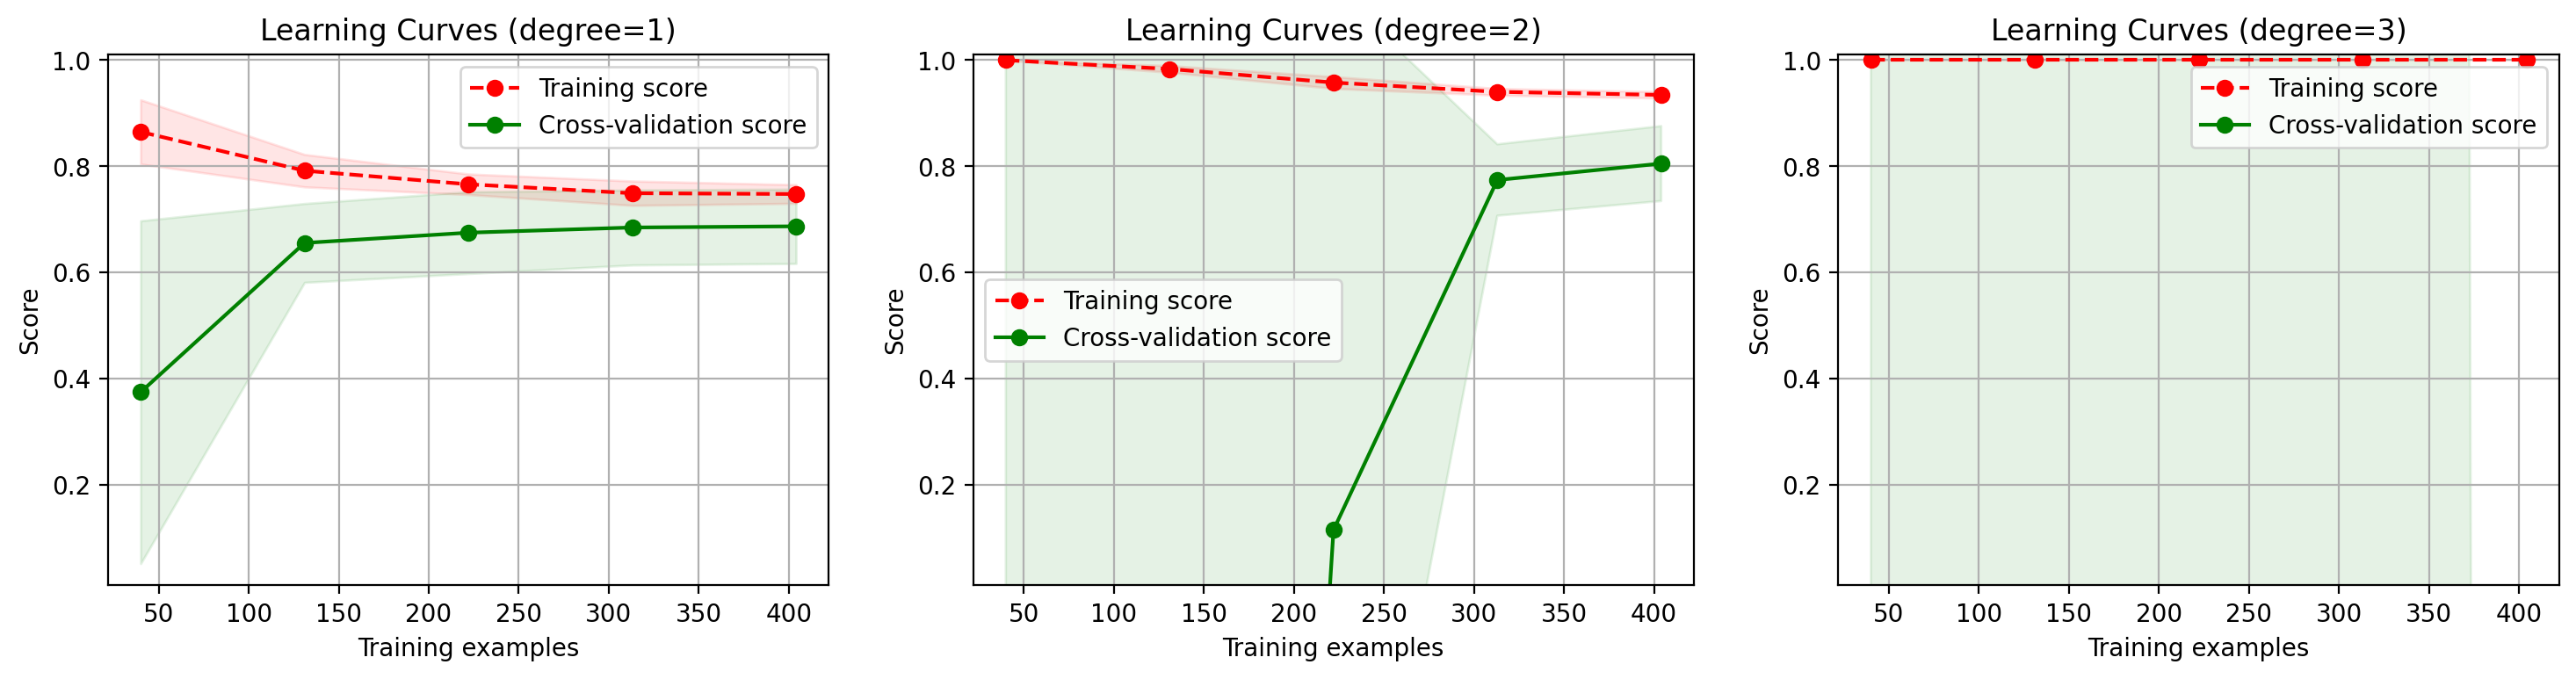

In [77]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]

plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynoamial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

##说明
    1、图一：从针对训练样本的分数来看，一阶多项式欠拟合
    2、图三：虽然训练集分数为1，但却看不到针对交叉验证数据集的分数，表明三阶多项式过拟合
    3、图二：二阶多项式虽然训练集的拟合程度要好于一阶多项式，但训练集和测试集之间的分数间隙比较大，这一特征说明训练样本的数量不够，应该去采集更多的数据，来提高模型的准确性。